# CH5440- Assignment 1                        
### -Himasree MM17B113

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# OLS

In [2]:
'''
Defining Ordinary least squares 
y=ax+b
from formulae, a= Syu/Suu and b=y_mean-a(x_mean)
'''
def getOLS(data,fea1, fea2):
    
    # calculating b

    y_mean=np.mean(data[fea1])
    x_mean=np.mean(data[fea2])

    # calculating numerator and denominator for a

    Syu= np.multiply(np.subtract(data[fea1],y_mean),np.subtract(data[fea2],x_mean))
    Syu=np.sum(Syu)/len(data)
    numerator=Syu

    Suu= np.multiply(np.subtract(data[fea2],x_mean),np.subtract(data[fea2],x_mean))
    Suu=np.sum(Suu)/len(data)
    denominator=Suu

    a_OLS=numerator/denominator

    b_OLS=y_mean-a_OLS*x_mean

    print('Slope Parameter of OLS:',a_OLS)
    print('Offset Parameter of OLS:',b_OLS)
#     print(Syu,Suu,x_mean,y_mean)
    return a_OLS,b_OLS

# TLS

In [3]:
'''
Defining Total least squares 
from formulae, a= ((Syy-Suu)+sqrt((Syy-Suu)^2+4*(Syu)^2))/2*Syu and
b=y_mean-a(x_mean)
'''
def getTLS(data,fea1,fea2):
    
    # calculating b

    y_mean=np.mean(data[fea1])
    x_mean=np.mean(data[fea2])

    # calculating numerator and denominator for a

    Syu= np.multiply(np.subtract(data[fea1],y_mean),np.subtract(data[fea2],x_mean))
    Syu=np.sum(Syu)/len(data)

    Suu= np.multiply(np.subtract(data[fea2],x_mean),np.subtract(data[fea2],x_mean))
    Suu=np.sum(Suu)/len(data)

    Syy=np.multiply(np.subtract(data[fea1],y_mean),np.subtract(data[fea1],y_mean))
    Syy=np.sum(Syy)/len(data)

    numerator=(Syy-Suu)+sqrt((Syy-Suu)**2+4*((Syu)**2))
    denominator=2*Syu

    a_TLS=numerator/denominator

    b_TLS=y_mean-a_TLS*x_mean

    print('Slope Parameter of TLS:',a_TLS)
    print('Offset Parameter of TLS:',b_TLS)
#     print(Syu,Suu,Syy,x_mean,y_mean)
    return a_TLS,b_TLS

# Question 2

In [4]:
# Data

Year=['1984','1985','1986','1987','1988','1989','1990','1991','1992',
      '1993','1994','1995','1996','1997','1998','1999','2000','2001',
      '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']
CO2=[344.58,346.04,347.39,349.16,351.56,353.07,354.35,355.57,356.38,
    357.07,358.82,360.8,362.59,363.71,366.65,368.33,369.52,371.13,373.22,
    375.77,377.49,379.8,381.9,383.76,385.59,387.37,389.85,391.63,393.82,
    396.48,398.61]
Temp=[0.27,0.234,0.414,0.666,0.666,0.522,0.774,0.72,0.45,0.504,0.612,
     0.81,0.576,0.918,1.134,0.792,0.756,0.972,1.08,1.098,1.026,1.17,
     1.098,1.098,0.972,1.134,1.26,1.026,1.116,1.188,1.332]
data=pd.DataFrame([Year,CO2,Temp]).transpose()

In [5]:
data.columns=['year','co2','temp']
data.year=data.year.astype('int') # converting data type into integers 

## Data Visualization

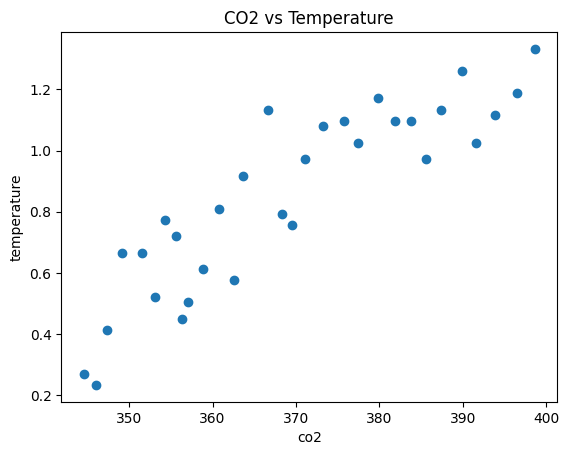

In [6]:
plt.scatter(data.co2,data.temp)
plt.xlabel('co2')
plt.ylabel('temperature')
plt.title('CO2 vs Temperature')
plt.show()

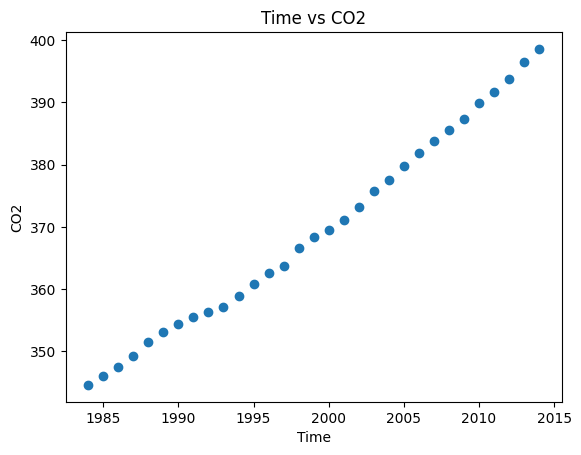

In [7]:
plt.scatter(data.year,data.co2)
plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('Time vs CO2')
plt.show()

#### Linear trend is observed between CO2 and Time. The trend between CO2 and Temperature is also nearly linear.

# Data Preprocessing
### The offset parameter is assumed to be non zero, therefore we need to mean shift the data

In [8]:
# mean shifting co2 fetaure when co2 is considered as dependent variable  for ols

def meanshift_co2(data):
    new_data=data
    co2_mean=np.mean(data.co2)
    new_data.co2=np.subtract(data.co2,co2_mean)
    return new_data

# mean shifting of temp fetaure when temp is considered as dependent variable for ols

def meanshift_temp(data):
    new_data=data
    temp_mean=np.mean(data.co2)
    new_data.temp=np.subtract(data.temp,temp_mean)
    return new_data

In [9]:
print('------Temperature vs CO2-------')
# Temperature vs CO2  OLS
a_OLS,b_OLS=getOLS(data,'co2','temp')

# Temperature vs CO2 TLS
a_TLS,b_TLS=getTLS(data,'co2','temp')

------Temperature vs CO2-------
Slope Parameter of OLS: 47.91908280514427
Offset Parameter of OLS: 328.62971751412437
Slope Parameter of TLS: 61.00011833950694
Offset Parameter of TLS: 317.4948024921643


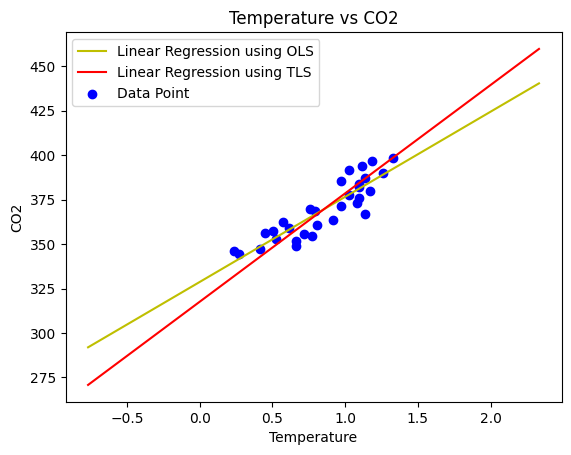

In [10]:
#plotting values 

x_max = np.max(data.temp) + 1
x_min = np.min(data.temp) - 1

#calculating line values of x and y

x = np.linspace(x_min, x_max, 1000)
y_OLS = b_OLS + a_OLS * x
y_TLS = b_TLS + a_TLS * x

#plotting line 

plt.plot(x, y_OLS, color='y', label='Linear Regression using OLS')
plt.plot(x, y_TLS, color='r', label='Linear Regression using TLS')
plt.scatter(data.temp, data.co2, color='b', label='Data Point')
plt.xlabel('Temperature')
plt.ylabel('CO2')
plt.title('Temperature vs CO2' )
plt.legend()
plt.show()

## Estimation the maximum permissible level of CO2 in the atmosphere

In [11]:
max_temp=2
max_CO2_OLS= b_OLS + a_OLS * max_temp
max_CO2_TLS= b_TLS + a_TLS * max_temp
print('maximum level of CO2 from OLS:',max_CO2_OLS)
print('maximum level of CO2 from TLS:',max_CO2_TLS)

maximum level of CO2 from OLS: 424.4678831244129
maximum level of CO2 from TLS: 439.4950391711782


In [12]:
print('------CO2 vs Time------')
# CO2 vs Time  OLS
a_OLS,b_OLS=getOLS(data,'year','co2')

# CO2 vs Time TLS
a_TLS,b_TLS=getTLS(data,'year','co2')

------CO2 vs Time------
Slope Parameter of OLS: 0.5573386606959692
Offset Parameter of OLS: 1793.10813175236
Slope Parameter of TLS: 0.5582713233653024
Offset Parameter of TLS: 1792.7635878099136


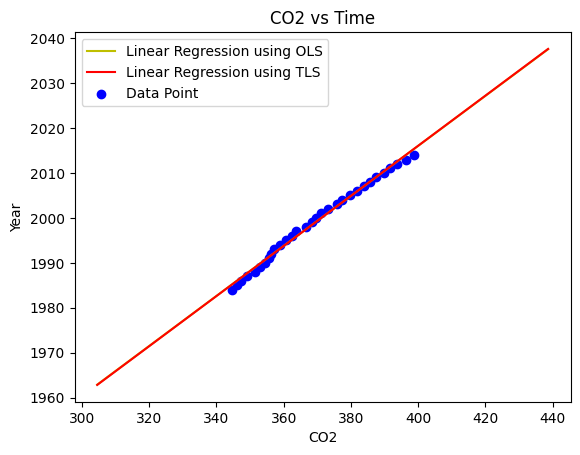

In [13]:
#plotting values 

x_max = np.max(data.co2) +40
x_min = np.min(data.co2) -40

#calculating line values of x and y

x = np.linspace(x_min, x_max, 1000)
y_OLS = b_OLS + a_OLS * x
y_TLS = b_TLS + a_TLS * x

#plotting line 

plt.plot(x, y_OLS, color='y', label='Linear Regression using OLS')
plt.plot(x, y_TLS, color='r', label='Linear Regression using TLS')
plt.scatter(data.co2, data.year, color='b', label='Data Point')
plt.xlabel('CO2')
plt.ylabel('Year')
plt.title('CO2 vs Time')
plt.legend()
plt.show()

## Estimation of how many years it will take for CO2 to reach the maximum permissible level

In [14]:
year_OLS= b_OLS + a_OLS * max_CO2_OLS
year_TLS= b_TLS + a_TLS * max_CO2_TLS
print('No. of years it will take for CO2 to reach the maximum permissible level from OLS:',year_OLS)
print('No. of years it will take for CO2 to reach the maximum permissible level from OLS:',year_TLS)

No. of years it will take for CO2 to reach the maximum permissible level from OLS: 2029.6804932413734
No. of years it will take for CO2 to reach the maximum permissible level from OLS: 2038.1210649404927


# Conclusion

## Estimation using OLS

In [15]:
print('----OLS----')
print('Maximum level of CO2:',max_CO2_OLS)
print('No. of years it will take for CO2 to reach the maximum permissible level:',year_OLS)

----OLS----
Maximum level of CO2: 424.4678831244129
No. of years it will take for CO2 to reach the maximum permissible level: 2029.6804932413734


## Estimation using TLS

In [16]:
print('----TLS----')
print('Maximum level of CO2:',max_CO2_TLS)
print('No. of years it will take for CO2 to reach the maximum permissible level:',year_TLS)

----TLS----
Maximum level of CO2: 439.4950391711782
No. of years it will take for CO2 to reach the maximum permissible level: 2038.1210649404927


# Question 3

In [17]:
# data

EP=[1.98,2.31,3.29,3.56,1.23,1.57,2.05,0.66,0.31,2.82,0.13,3.15,2.72,
   2.31,1.92,1.56,0.94,2.27,3.17,2.36]
CF=[1.87,2.20,3.15,3.42,1.10,1.41,1.84,0.68,0.27,2.8,0.14,3.2,
    2.7,2.43,1.78,1.53,0.84,2.21,3.10,2.34]
data=pd.DataFrame([EP,CF]).transpose()
data.columns=['EP','CF']

In [18]:
data

,EP,CF
0,1.98,1.87
1,2.31,2.20
2,3.29,3.15
3,3.56,3.42
4,1.23,1.10
5,1.57,1.41
6,2.05,1.84
7,0.66,0.68
8,0.31,0.27
9,2.82,2.80


# Data Visualization

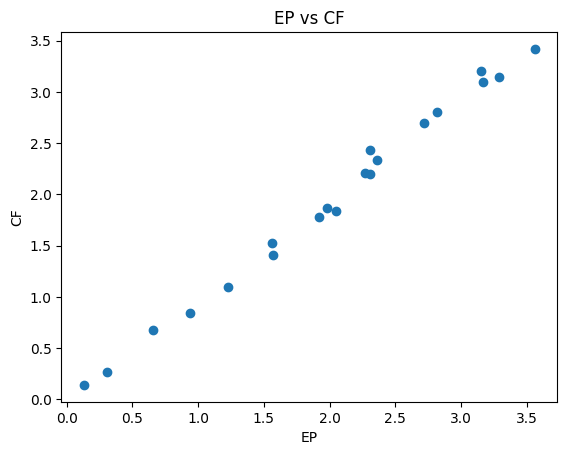

In [19]:
plt.scatter(data.EP,data.CF)
plt.xlabel('EP')
plt.ylabel('CF')
plt.title('EP vs CF')
plt.show()

### Linear trend is observed between EP vs CF

In [20]:
print('                  EP vs CF')
print('                 ----OLS----')
# EP vs CF  OLS
a_OLS,b_OLS=getOLS(data,'CF','EP')
print('                 ----IOLS----')
# EP vs CF IOLS (dependent and independent variables are reversed)
a_IOLS,b_IOLS=getOLS(data,'EP','CF')    # the parameters for OLS is printed because we are using same getOLS function for both OLS and IOLS

                  EP vs CF
                 ----OLS----
Slope Parameter of OLS: 0.9924151686960456
Offset Parameter of OLS: -0.04971277250687978
                 ----IOLS----
Slope Parameter of OLS: 1.0008962953756306
Offset Parameter of OLS: 0.06325177586983233


### 3a. In OLS, the EP measurements are assumed to be error free and in IOLS, the CF measurements are assumed to be error free.

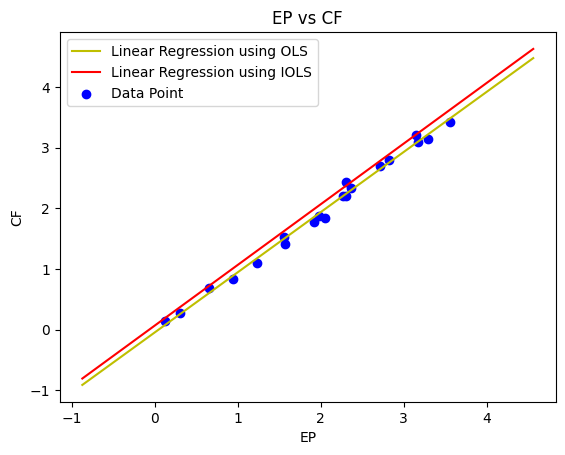

In [21]:
#plotting values 

x_max = np.max(data.EP) +1
x_min = np.min(data.EP) -1

#calculating line values of x and y

x = np.linspace(x_min, x_max, 1000)
y_OLS = b_OLS + a_OLS * x
y_IOLS = b_IOLS + a_IOLS * x

#plotting line 

plt.plot(x, y_OLS, color='y', label='Linear Regression using OLS')
plt.plot(x, y_IOLS, color='r', label='Linear Regression using IOLS')
plt.scatter(data.EP, data.CF, color='b', label='Data Point')
plt.xlabel('EP')
plt.ylabel('CF')
plt.title('EP vs CF')
plt.legend()
plt.show()

### OLS and IOLS model equations are almost same the slope parameter for both the methods is nearly 1 and the offset parameters for both the methods is nearly 0. Therefore, CF is good substitute of EP method.

In [22]:
# Covariance between EP and CF
y_mean=np.mean(data['EP'])
x_mean=np.mean(data['CF'])
Syu= np.multiply(np.subtract(data['EP'],y_mean),np.subtract(data['CF'],x_mean))
Syu=np.sum(Syu)/len(data)
print('Covariance between EP and CF',Syu)

Covariance between EP and CF 0.9240722500000003


### The covariance between EP and CF is almost 1 which is 0.92 indicating the strong linear relationship between EP and CF

# b. Estimation of level of phytic acid

In [23]:
# 95% confidence interval for a is a+/- 2.16*sqrt(variance of a)
# variance of a is given by variance of epsilon (errors) divided by N times Suu

# x is EP and y is CF
x_mean=np.mean(data['EP'])
Suu= np.multiply(np.subtract(data['EP'],x_mean),np.subtract(data['EP'],x_mean))
Suu=np.sum(Suu)/len(data)

sum_er_OLS=np.sum(np.power(np.subtract(data.CF,np.add(np.multiply(a_OLS,data.EP),b_OLS)),2))
sigma_ep_OLS=sqrt(sum_er_OLS/(len(EP)-2)) # variance of errors
sigma_a_OLS=sqrt(sigma_ep_OLS/len(EP)*Suu) # variance of a

a_OLS_min=a_OLS-2.16*sigma_a_OLS
a_OLS_max=a_OLS+2.16*sigma_a_OLS
print('95% CI for a_OLS is [',a_OLS_min,',',a_OLS_max,']')

# x is CF and y is EP
x_mean=np.mean(data['CF'])
Suu= np.multiply(np.subtract(data['CF'],x_mean),np.subtract(data['CF'],x_mean))
Suu=np.sum(Suu)/len(data)

sum_er_IOLS=np.sum(np.power(np.subtract(data.EP,np.add(np.multiply(a_OLS,data.CF),b_OLS)),2))
sigma_ep_IOLS=sqrt(sum_er_IOLS/(len(EP)-2)) # variance of errors
sigma_a_IOLS=sqrt(sigma_ep_IOLS/len(EP)*Suu) # variance of a

a_IOLS_min=a_IOLS-2.16*sigma_a_IOLS
a_IOLS_max=a_IOLS+2.16*sigma_a_IOLS
print('95% CI for a_IOLS is [',a_IOLS_min,',',a_IOLS_max,']')

95% CI for a_OLS is [ 0.8582447825578582 , 1.126585554834233 ]
95% CI for a_IOLS is [ 0.8151965630369092 , 1.186596027714352 ]


In [24]:
# given values

EP_val=2.31
CF_val=2.20

# In OLS method, EP is assumed to be accurate and in IOLS CF is assumed to be accurate

print('CF:[', b_OLS + a_OLS_min *EP_val,',',b_OLS + a_OLS_max *EP_val,']' )
print('EP:[', b_IOLS + a_IOLS_min *CF_val,',',b_IOLS + a_IOLS_max *CF_val,']' )

CF:[ 1.9328326752017726 , 2.5526998591601986 ]
EP:[ 1.8566842145510327 , 2.6737630368414065 ]


# Conclusion

### CF is good substitute of EP method.
### With 95% confidence level, the level of phytic acid in urine is estimated to be in the interval [1.9 , 2.6] from OLS method and in the interval [1.8 , 2.7] from IOLS method. 


# Question 4

In [25]:
data=pd.read_csv('defects_annotation_data.csv')          # import data

# data cleaning

data.columns=['x1','y1','g1','x2','y2','g2','x3','y3']   # renaming columns
data.drop(['g1','g2'],axis=1,inplace=True)               # dropping empty columns
data=data.iloc[1:,:]                                     # removing the row with x,y,..
data.head()                                              # cleaned data

,x1,y1,x2,y2,x3,y3
1,3557,826,2183,3241,2931,3706
2,3557,809,2177,3235,2930,3693
3,3565,812,2172,3234,2928,3691
4,3591,816,2166,3229,2927,3685
5,3607,816,2162,3228,2924,3682


In [26]:
defect1=data[['x1','y1']]
defect2=data[['x2','y2']]
defect3=data[['x3','y3']]

#removing NaN rows

defect1.dropna(inplace=True)
defect2.dropna(inplace=True)
defect3.dropna(inplace=True)

# converting datatype to integers

defect1=defect1.astype('int')
defect2=defect2.astype('int')
defect3=defect3.astype('int')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


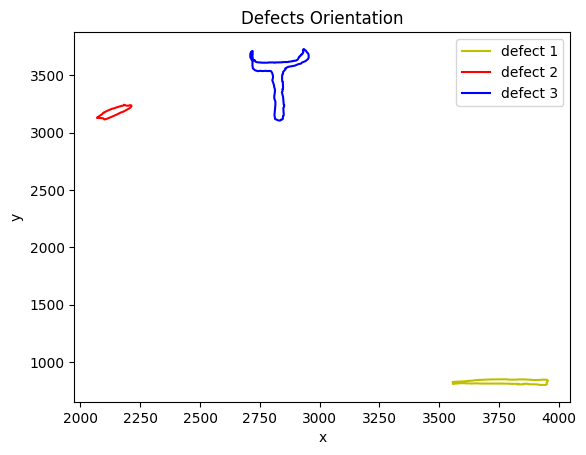

In [27]:
plt.plot(defect1.x1,defect1.y1,color='y',label='defect 1')
plt.plot(defect2.x2,defect2.y2,color='r',label='defect 2')
plt.plot(defect3.x3,defect3.y3,color='b',label='defect 3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Defects Orientation')
plt.show()

In [28]:
# mean shift

dfs=[defect1,defect2,defect3]
for df in dfs:
    for cols in df.columns:
        df[cols]=df[cols]-df[cols].mean()

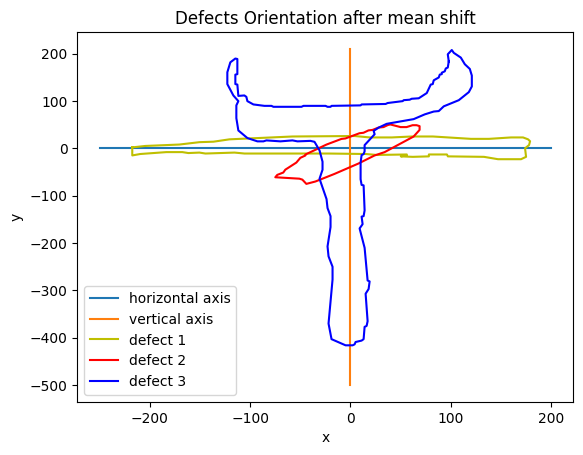

In [30]:
# horizontal line
x_h=np.linspace(-250, +200, 1000)
y_h=np.zeros(1000)

# vertical line
x_v=np.zeros(1000)
y_v=np.linspace(-500, +210, 1000)

plt.plot(x_h,y_h,label='horizontal axis')
plt.plot(x_v,y_v,label='vertical axis')

plt.plot(defect1.x1,defect1.y1,color='y',label='defect 1')
plt.plot(defect2.x2,defect2.y2,color='r',label='defect 2')
plt.plot(defect3.x3,defect3.y3,color='b',label='defect 3')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Defects Orientation after mean shift')
plt.legend()
plt.show()

# Conclusion

### Defect 1 and defect 3 are due to corrosion as they are oriented along the horizontal or vertical axis (indicating perhaps it is due to corrosion of vertical or horizontal steel reinforcement bars buried within the concrete).